# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Anak Agung Ayu Citra Maharani
- **Email:** agungcitra2717@gmail.com
- **ID Dicoding:** anak_agung876

## Menentukan Pertanyaan Bisnis

- Apa saja kategori produk yang paling laku dan paling tidak laku?
- Bagaimana distribusi pesanan di berbagai negara bagian (state)?
- Bagaimana pengaruh durasi pengiriman terhadap peringkat dari pelanggan (score_review)?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- Bagaimana pelanggan dapat disegmentasikan berdasarkan kebiasaan pembelian mereka?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
product_category_name_df = pd.read_csv("data/product_category_name_translation.csv")
products_df = pd.read_csv("data/products_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")

In [3]:
# Melihat isi dari customer_df
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
# Melihat isi dari geolocation_df
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [5]:
# Melihat isi dari order_items_df
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [6]:
# Melihat isi dari order_payments_df
order_payments_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [7]:
# Melihat isi dari order_reviews_df
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [8]:
# Melihat isi dari orders_df
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [9]:
# Melihat isi dari product_category_name_df
product_category_name_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [10]:
# Melihat isi dari products_df
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [11]:
# Melihat isi dari sellers_df
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

**Insight**
Dari proses Gathering Data, ditemukan bahwa masing-masing dataframe di atas mempunyai jumlah kolom yang cukup banyak

### Assessing Data

In [12]:
# Melihat informasi sederhana dari customer_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
# Melihat informasi sederhana dari geolocation_df
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
# Melihat informasi sederhana dari order_items_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
# Melihat informasi sederhana dari order_payments_df
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
# Melihat informasi sederhana dari order_reviews_df
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
# Melihat informasi sederhana dari orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
# Melihat informasi sederhana dari product_category_name_df
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
# Melihat informasi sederhana dari products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
# Melihat informasi sederhana dari sellers_df
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Check for Nan value in column

In [21]:
print("\nJumlah Nan Value pada customers_df \n",customers_df.isna().sum())
print("\nJumlah Nan Value pada geolocation_df \n",geolocation_df.isna().sum())
print("\nJumlah Nan Value pada order_items_df \n",order_items_df.isna().sum())
print("\nJumlah Nan Value pada order_payments_df \n",order_payments_df.isna().sum())
print("\nJumlah Nan Value pada order_reviews_df \n",order_reviews_df.isna().sum())
print("\nJumlah Nan Value pada orders_df \n",orders_df.isna().sum())
print("\nJumlah Nan Value pada product_category_name_df \n",product_category_name_df.isna().sum())
print("\nJumlah Nan Value pada products_df \n",products_df.isna().sum())
print("\nJumlah Nan Value pada sellers_df \n",sellers_df.isna().sum())


Jumlah Nan Value pada customers_df 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah Nan Value pada geolocation_df 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah Nan Value pada order_items_df 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah Nan Value pada order_payments_df 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah Nan Value pada order_reviews_df 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title      

#### Check for duplicate data in dataframe

In [22]:
print("Jumlah duplikasi customers_df\t\t\t: ", customers_df.duplicated().sum())
print("Jumlah duplikasi geolocation_df\t\t\t: ", geolocation_df.duplicated().sum())
print("Jumlah duplikasi order_items_df\t\t\t: ", order_items_df.duplicated().sum())
print("Jumlah duplikasi order_payments_df\t\t: ", order_payments_df.duplicated().sum())
print("Jumlah duplikasi order_reviews_df\t\t: ", order_reviews_df.duplicated().sum())
print("Jumlah duplikasi orders_df\t\t\t: ", orders_df.duplicated().sum())
print("Jumlah duplikasi product_category_name_df\t: ", product_category_name_df.duplicated().sum())
print("Jumlah duplikasi products_df\t\t\t: ", products_df.duplicated().sum())
print("Jumlah duplikasi sellers_df\t\t\t: ", sellers_df.duplicated().sum())

Jumlah duplikasi customers_df			:  0
Jumlah duplikasi geolocation_df			:  261831
Jumlah duplikasi order_items_df			:  0
Jumlah duplikasi order_payments_df		:  0
Jumlah duplikasi order_reviews_df		:  0
Jumlah duplikasi orders_df			:  0
Jumlah duplikasi product_category_name_df	:  0
Jumlah duplikasi products_df			:  0
Jumlah duplikasi sellers_df			:  0


#### Check detail in each dataframe's feature

In [23]:
# Melihat detail informasi dalam kolom dari customer_df
customers_df.describe()

customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

In [24]:
# Melihat detail informasi dalam kolom dari geolocation_df
geolocation_df.describe()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

In [25]:
# Melihat detail informasi dalam kolom dari order_items_df
order_items_df.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [26]:
# Melihat detail informasi dalam kolom dari order_payments_df
order_payments_df.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [27]:
# Melihat detail informasi dalam kolom dari order_reviews_df
order_reviews_df.describe()

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [28]:
# Melihat detail informasi dalam kolom dari orders_df
orders_df.describe()

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 19:36:48   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

In [29]:
# Melihat detail informasi dalam kolom dari product_category_name_df
product_category_name_df.describe()

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

In [30]:
# Melihat detail informasi dalam kolom dari products_df
products_df.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [31]:
# Melihat detail informasi dalam kolom dari sellers_df
sellers_df.describe()

seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

**Insight:**

Dari proses penilaian terhadap masing - masing dataframe di atas ditemukan beberapa masalah yaitu
Missing Value
- Terdapat Nan value di 2 kolom order_review_df. Hal ini terjadi karena saat proses review, terdapat beberapa pelanggan yang tidak melengkapi keseluruhan inputan review (non-required)
- Terdapat Nan value di 3 kolom orders_df. Nan value dalam kolom tersebut disebabkan karena dataframe ini merupakan dataframe yang mencatat proses order hingga sampai ke pelanggan. Namun karena beberapa order masih belum sampai ke pelanggan atau masih diproses menyebabkan kolom tersebut Nan.
- Terakhir terdapat Nan value di keseluruhan kolom yang ada dalam products_df

Duplicated rows
- Terdapat duplikasi data dalam geolocation_df sebanyak 261.831 rows

### Cleaning Data

#### Geolocation Dataframe

In [32]:
print("Jumlah duplikasi geolocation_df :", geolocation_df.duplicated().sum())

Jumlah duplikasi geolocation_df : 261831


In [33]:
geolocation_df.drop_duplicates(inplace=True)

In [34]:
print("Jumlah duplikasi geolocation_df :", geolocation_df.duplicated().sum())

Jumlah duplikasi geolocation_df : 0


#### Order reviews dataframe

In [35]:
print("\n",order_reviews_df.isna().sum())


 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [36]:
order_reviews_df.fillna(value="-", inplace=True)

In [37]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [38]:
# change to datetime type
order_datetime = ["review_creation_date", "review_answer_timestamp"]

for column in order_datetime:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [39]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Order dataframe

In [40]:
print("\n",orders_df.isna().sum())


 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [41]:
orders_df = orders_df.dropna(how="any")

In [42]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [43]:
# change to datetime type
order_datetime = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in order_datetime:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [44]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### order items df

In [45]:
# change to datetime type
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [46]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Asumsikan bahwa geolocation_df berisi semua lokasi unik dalam data, jadi kita perlu menghapus data duplikat tersebut.
- Dari proses penilaian, kita mengetahui bahwa ada beberapa kolom dalam data order_reviews yang berisi missing value. Jadi kita perlu mengisinya.
- Dilakukan proses drop terhadap rows berisi missing value di orders_df sehingga dapat lebih mudah untuk mengkonversi type datanya

## Exploratory Data Analysis (EDA)

- Apa saja kategori produk yang paling laku dan paling tidak laku?
- Bagaimana distribusi pesanan di berbagai negara bagian (state)?
- Bagaimana pengaruh durasi pengiriman terhadap peringkat dari pelanggan (score_review)?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- Bagaimana pelanggan dapat disegmentasikan berdasarkan kebiasaan pembelian mereka?

### Explore customers_df

In [47]:
customers_df.sample(5)

customer_id                customer_unique_id  \
58771  48a8e08cbe87ac7b90b76ff80d3df46b  81fc606558d479bbe026450862a4f2df   
75228  a7132a5c7513a9e1922019bc2812a6cf  cdaa770a6d8540c61282e1e43af1db8f   
43820  4b1b5c848616a4b5fa9d76cb1d12067b  3c857a6f7828bfb70fb712e2393cfd1b   
57065  9fa56e6eb804eb7f8c2d80a133c84546  f80c7e4cf2fa8ff3532323f19bf603ba   
81838  d07229daef278cf8f7e6be74a2c960b5  8a031436ab32c9921b305422b97c4ea4   

       customer_zip_code_prefix customer_city customer_state  
58771                     29500        alegre             ES  
75228                     91530  porto alegre             RS  
43820                      5727     sao paulo             SP  
57065                      4815     sao paulo             SP  
81838                     36036  juiz de fora             MG

In [48]:
customers_df.describe(include="all")

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

In [49]:
customers_df.customer_id.is_unique

True

In [50]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [51]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore geolocation_df

In [52]:
geolocation_df.sample(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
886370                        86165       -22.868736       -51.393821   
598267                        35519       -19.871050       -45.009850   
391797                        18500       -23.033543       -47.834069   
432905                        21765       -22.888522       -43.428322   
678023                        41720       -12.971385       -38.435211   

         geolocation_city geolocation_state  
886370      florestopolis                PR  
598267       nova serrana                MG  
391797  laranjal paulista                SP  
432905     rio de janeiro                RJ  
678023           salvador                BA

In [53]:
geolocation_df.describe(include="all")

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000    738332.000000   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   38316.086800       -20.998353       -46.461098   
std                    30632.496675         5.892315         4.393705   
min                     1001.000000       -36.605374      -101.466766   
25%                    12600.000000       -23.603061       -48.867822   
50%                    29144.000000       -22.873588       -46.647278   
75%                    65950.000000       -19.923336       -43.836974   
max                    99990.000000        45.065933       121.105394   

       geolocation_city geolocation_state  
count            738332            738332  
unique             8011                27  
top           sao paulo                SP  
freq              79927            285976  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

In [54]:
geolocation_df.groupby("geolocation_state").geolocation_city.nunique().sort_values(ascending=False)

geolocation_state
MG    1426
SP    1048
RS     691
BA     652
PR     651
SC     420
GO     384
MA     299
PI     278
PE     267
CE     260
PB     254
RJ     245
PA     219
RN     214
MT     213
TO     173
ES     160
MS     133
AL     130
SE      96
RO      83
AM      74
AC      34
DF      28
AP      17
RR      14
Name: geolocation_city, dtype: int64

#### Explore order_items_df

In [55]:
order_items_df.sample(5)

order_id  order_item_id  \
54331  7b78cc6982a3e84c736e54249ed7612c              2   
61170  8b6d201fff0b1b32e59f7cbdc6beaf54              5   
29597  434d1997e63b6e122dafe2a81ce31850              1   
74722  aa2dc936dd126536c8f2eb4dbaf37333              4   
40236  5b97959bc8102d72edcb01bdb5a0e9df              1   

                             product_id                         seller_id  \
54331  101c51628f18e013a1b2900a8f275fd2  17a053fcb14bd219540cbde0df490be0   
61170  16ce899c7af0c99f46948734a0d00f0f  0725b8c0f3f906e58f70cbe76b7c748c   
29597  371c121dc86b3821f720e7dbe1928207  4830e40640734fc1c52cd21127c341d4   
74722  134afbb1d3ef60a407f8e4491dd63622  8160255418d5aaa7dbdc9f4c64ebda44   
40236  9b968712a8768d8e23318f73476af1a3  7a67c85e85bb2ce8582c35f2203ad736   

      shipping_limit_date   price  freight_value  
54331 2018-08-02 17:04:35  219.98         104.93  
61170 2017-01-25 17:17:20   79.61          10.00  
29597 2017-12-27 13:13:33   15.99          15.10  
74722 2018-08-01 08:45:09   39.90           9.10  
40236 2017-07-07 20:03:43    9.99          16.60

In [56]:
order_items_df.describe(include="all")

order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   
std                                  NaN       0.705124   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

                  shipping_limit_date          price  freight_value  
count                          112650  112650.000000  112650.000000  
unique                            NaN            NaN            NaN  
top                               NaN            NaN            NaN  
freq                              NaN            NaN            NaN  
mean    2018-01-07 15:36:52.192685312     120.653739      19.990320  
min               2016-09-19 00:15:34       0.850000       0.000000  
25%        2017-09-20 20:57:27.500000      39.900000      13.080000  
50%               2018-01-26 13:59:35      74.990000      16.260000  
75%     2018-05-10 14:34:00.750000128     134.900000      21.150000  
max               2020-04-09 22:35:08    6735.000000     409.680000  
std                               NaN     183.633928      15.806405

In [57]:
order_items_df.groupby(by="order_id").agg({
    "price": ["sum"]
})

price
                                     sum
order_id                                
00010242fe8c5a6d1ba2dd792cb16214   58.90
00018f77f2f0320c557190d7a144bdd3  239.90
000229ec398224ef6ca0657da4fc703e  199.00
00024acbcdf0a6daa1e931b038114c75   12.99
00042b26cf59d7ce69dfabb4e55b4fd9  199.90
...                                  ...
fffc94f6ce00a00581880bf54a75a037  299.99
fffcd46ef2263f404302a634eb57f7eb  350.00
fffce4705a9662cd70adb13d4a31832d   99.90
fffe18544ffabc95dfada21779c9644f   55.99
fffe41c64501cc87c801fd61db3f6244   43.00

[98666 rows x 1 columns]

#### Explore order_payments_df

In [58]:
order_payments_df.sample(5)

order_id  payment_sequential payment_type  \
27743  170dcd772ea4f51c3a859f9beef5d297                   2      voucher   
28323  c5b1a5d21958f98a0c66114d622bc0ed                   1  credit_card   
46958  5b33244d158adb23abb0d481fa052af8                   1  credit_card   
6116   51d7a5256a29ae35eeaa4d7bbf14931a                   1  credit_card   
22032  f32569596f879e74fced40a4bab98fc7                   1       boleto   

       payment_installments  payment_value  
27743                     1          50.00  
28323                     1          39.11  
46958                    10         144.27  
6116                      1          55.09  
22032                     1         327.87

In [59]:
order_payments_df.describe(include="all")

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

In [60]:
order_payments_df.groupby(by="payment_type").agg({
    "payment_value": ["max", "min", "mean", "sum"]
})

payment_value                                
                       max    min        mean          sum
payment_type                                              
boleto             7274.88  11.62  145.034435   2869361.27
credit_card       13664.08   0.01  163.319021  12542084.19
debit_card         4445.50  13.38  142.570170    217989.79
not_defined           0.00   0.00    0.000000         0.00
voucher            3184.34   0.00   65.703354    379436.87

#### Explore order_reviews_df

In [61]:
order_reviews_df.sample(5)

review_id                          order_id  \
86944  871681693fa9999610baa2b15c14f132  84a649c5b7af51c49e0041fb5e3486d8   
74448  4fcf7aa281a926366b0eac675ce90ce2  4ccf6ee1044ab9f8ec63953f1f2a708d   
15447  a931fb22fbf1935545451e51208b082c  0a5e1bafba05f64884feb58a0bd822a0   
75594  2ea93af37bfa3ff48ab9d84b34ab508e  0ca8b6de19bde0d4ed1fe6f90f475ab5   
30284  4c4357a598317eaa15557bb21d3a448d  3c003c58ad1a4915b94afef4b6ca5271   

       review_score review_comment_title  \
86944             5                    -   
74448             4            recomendo   
15447             5                    -   
75594             5                    -   
30284             1       Não recomendo    

                                  review_comment_message review_creation_date  \
86944                                                  -           2018-05-19   
74448  Pois bem, como acima citado o produto foi entr...           2018-05-17   
15447                                                  -           2018-01-27   
75594  Ainda não foi possível avaliar o produto mas a...           2017-12-16   
30284  Não recomendo para este tipo de produto, visto...           2018-07-26   

      review_answer_timestamp  
86944     2018-05-21 10:08:52  
74448     2018-05-20 21:08:49  
15447     2018-01-29 18:41:57  
75594     2017-12-18 09:33:55  
30284     2018-07-30 10:47:03

In [62]:
order_reviews_df.describe(include="all")

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     08528f70f579f0c830189efc523d2182  df56136b8031ecd28e200bb18e6ddb2e   
freq                                   3                                 3   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                99224                  99224   
unique           NaN                 4527                  36159   
top              NaN                    -                      -   
freq             NaN                87657                  58250   
mean        4.086421                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   
std         1.347579                  NaN                    NaN   

                 review_creation_date        review_answer_timestamp  
count                           99224                          99224  
unique                            NaN                            NaN  
top                               NaN                            NaN  
freq                              NaN                            NaN  
mean    2018-01-12 20:49:23.948238336  2018-01-16 00:23:56.977938688  
min               2016-10-02 00:00:00            2016-10-07 18:32:28  
25%               2017-09-23 00:00:00  2017-09-27 01:53:27.249999872  
50%               2018-02-02 00:00:00     2018-02-04 22:41:47.500000  
75%               2018-05-16 00:00:00     2018-05-20 12:11:21.500000  
max               2018-08-31 00:00:00            2018-10-29 12:27:35  
std                               NaN                            NaN

In [63]:
order_reviews_df.groupby("review_score").agg({
    "order_id" : "nunique"
})

order_id
review_score          
1                11393
2                 3148
3                 8160
4                19098
5                57076

#### Explore orders_df

In [64]:
orders_df.sample(5)

order_id                       customer_id  \
34582  deea4294a344e9365bcb722dca9047d1  f7cadf307a192b65c847a1fe65ca288e   
46944  0667371275636232a05d55f2a8eada60  79e4ac5ef12e80fa1a850417b9c2156a   
31467  309b9de8813533826a3005f94bee92b9  7d256faf9786f86ad032ffdc9554ea2d   
19036  52076105d0ca4133091c2c1db1d4bb9c  b7467e21ccbe2f30a3d2e992eaf6a6e1   
78563  fa350da9efbba83c2957b629bf6c2c7c  7497a06928794c94a04ed924922922e5   

      order_status order_purchase_timestamp   order_approved_at  \
34582    delivered      2018-05-12 10:49:46 2018-05-12 11:13:59   
46944    delivered      2018-07-08 12:06:00 2018-07-08 12:25:22   
31467    delivered      2018-04-24 14:31:39 2018-04-25 14:33:20   
19036    delivered      2018-05-02 11:12:39 2018-05-03 04:13:02   
78563    delivered      2017-04-22 11:35:34 2017-04-24 16:45:13   

      order_delivered_carrier_date order_delivered_customer_date  \
34582          2018-05-15 12:39:00           2018-05-16 19:41:32   
46944          2018-07-10 15:27:00           2018-07-24 00:32:19   
31467          2018-04-26 13:38:00           2018-05-04 18:56:50   
19036          2018-05-07 15:03:00           2018-05-09 21:58:31   
78563          2017-04-26 10:08:57           2017-05-09 07:22:54   

      order_estimated_delivery_date  
34582                    2018-05-25  
46944                    2018-07-31  
31467                    2018-05-23  
19036                    2018-05-24  
78563                    2017-05-26

In [65]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99436    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  delivery_time  
0                        2017-10-18            6.0  
1                        2018-08-13           12.0  
2                        2018-09-04            9.0  
3                        2017-12-15            9.0  
4                        2018-02-26            2.0  
...                             ...            ...  
99436                    2017-03-28            7.0  
99437                    2018-03-02           21.0  
99438                    2017-09-27           24.0  
99439                    2018-02-15           13.0  
99440                    2018-04-03            7.0  

[96461 rows x 9 columns]

#### Explore sellers_df

In [66]:
sellers_df.sample(5)

seller_id  seller_zip_code_prefix seller_city  \
1430  d9442042130b7fe579d1295f9f4a248f                    3550   sao paulo   
1656  f00e21b1e91a79653163b7fd8f293ff1                   37795    andradas   
1796  41b86b552e54e3a7009596125aa8b167                    2470   sao paulo   
847   c1f12f926d0ba950578b4fa41115cbb6                    4317   sao paulo   
859   7c9130f5f3729edd32aa059141d92484                   17400       garca   

     seller_state  
1430           SP  
1656           SP  
1796           SP  
847            SP  
859            SP

In [67]:
sellers_df.describe(include="all")

seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     9e25199f6ef7e7c347120ff175652c3b                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

In [68]:
sellers_df["seller_id"].is_unique

True

In [69]:
sellers_df.groupby("seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

### Explore customers_df and orders_df

In [70]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  delivery_time  
0           2017-05-25 10:35:35                    2017-06-05            2.0  
1           2018-01-29 12:41:19                    2018-02-06           14.0  
2           2018-06-14 17:58:51                    2018-06-13            3.0  
3           2018-03-28 16:04:25                    2018-04-10            1.0  
4           2018-08-09 20:55:48                    2018-08-15           10.0

In [71]:
cust_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64

#### Merge cust_orders_df and order_reviews_df

In [72]:
order_cus_review_df = pd.merge(
    left=cust_orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_cus_review_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  delivery_time  \
0           2017-05-25 10:35:35                    2017-06-05            2.0   
1           2018-01-29 12:41:19                    2018-02-06           14.0   
2           2018-06-14 17:58:51                    2018-06-13            3.0   
3           2018-03-28 16:04:25                    2018-04-10            1.0   
4           2018-08-09 20:55:48                    2018-08-15           10.0   

                          review_id  review_score review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b           4.0                    -   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           5.0                    -   
2  5ad6695d76ee186dc473c42706984d87           5.0                    -   
3  059a801bb31f6aab2266e672cab87bc5           5.0                    -   
4  8490879d58d6c5d7773f2739a03f089a           5.0        a melhor nota   

                          review_comment_message review_creation_date  \
0                                              -           2017-05-26   
1                                              -           2018-01-30   
2                                              -           2018-06-15   
3                                              -           2018-03-29   
4  O baratheon è esxelente Amo adoro o baratheon           2018-08-10   

  review_answer_timestamp  
0     2017-05-30 22:34:40  
1     2018-02-10 22:43:29  
2     2018-06-15 12:10:59  
3     2018-04-02 18:36:47  
4     2018-08-17 01:59:52

### Merge order_cus_review_df and order_payments_df

In [73]:
order_detail_df = pd.merge(
    left=order_cus_review_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_detail_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...   

                          review_id review_score  review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b          4.0                     -   
1  02fc48a9efa3e3d0f1a8ea26507eeec3          5.0                     -   
2  5ad6695d76ee186dc473c42706984d87          5.0                     -   
3  059a801bb31f6aab2266e672cab87bc5          5.0                     -   
4  8490879d58d6c5d7773f2739a03f089a          5.0         a melhor nota   

                          review_comment_message  review_creation_date  \
0                                              -            2017-05-26   
1                                              -            2018-01-30   
2                                              -            2018-06-15   
3                                              -            2018-03-29   
4  O baratheon è esxelente Amo adoro o baratheon            2018-08-10   

  review_answer_timestamp payment_sequential payment_type  \
0     2017-05-30 22:34:40                1.0  credit_card   
1     2018-02-10 22:43:29                1.0  credit_card   
2     2018-06-15 12:10:59                1.0  credit_card   
3     2018-04-02 18:36:47                1.0  credit_card   
4     2018-08-17 01:59:52                1.0  credit_card   

  payment_installments  payment_value  
0                  2.0         146.87  
1                  8.0         335.48  
2                  7.0         157.73  
3                  1.0         173.30  
4                  8.0         252.25  

[5 rows x 23 columns]

In [74]:
order_detail_df.groupby("review_score").agg({
    "delivery_time": ["mean"]
})

delivery_time
                      mean
review_score              
1.0              16.543295
2.0              12.565006
3.0              10.622925
4.0               9.083552
5.0               7.772207

In [75]:
order_detail_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    74302
boleto         19177
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

#### Merge order_detail_df and order_items_df

In [76]:
order_items_detail_df = pd.merge(
    left=order_detail_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_detail_df.sample(5)

customer_id                customer_unique_id  \
24220   7351112249105109b7979df7a2fa2e59  0d73f391122f11e944b57b07632a3b3e   
99559   3fc94ea7aed9a5ab86431c3842c44542  049978bae2febc352587dab45fb38d3a   
42667   5caa22731be0c213512d14d62bbd1275  fa1ea6a8b8c6186ffa4e5e76d82d7c41   
105573  68d8144a07678ddc6c45bf0af744e865  06befcbb6c53f601d005532bb48d7410   
107421  40186e58e5331d475bac4a234986a029  f3a00ac7ef765a53370cd03daf250c2c   

        customer_zip_code_prefix      customer_city customer_state  \
24220                      96840  santa cruz do sul             RS   
99559                      22231     rio de janeiro             RJ   
42667                      72210           brasilia             DF   
105573                      5016          sao paulo             SP   
107421                      5202          sao paulo             SP   

                                order_id order_status  \
24220   6dfce09652603d20237e1bc7caf8fd38    delivered   
99559   561e6fec91c4b5771dad3f613b72c699    delivered   
42667   193dce17420e5a1662145bdba0605cd6    delivered   
105573  e466da8b1fce311e8469cb62530c18a9    delivered   
107421  94dcbb5ca9d603177841a40f3d630483    delivered   

       order_purchase_timestamp   order_approved_at  \
24220       2018-05-03 08:57:15 2018-05-05 03:33:39   
99559       2018-02-06 17:02:06 2018-02-06 17:15:29   
42667       2018-01-08 16:50:39 2018-01-09 16:52:49   
105573      2018-08-16 05:54:30 2018-08-16 06:10:06   
107421      2018-07-04 17:41:00 2018-07-05 16:32:52   

       order_delivered_carrier_date  ... payment_sequential payment_type  \
24220           2018-05-08 15:37:00  ...                1.0       boleto   
99559           2018-02-07 20:28:34  ...                1.0  credit_card   
42667           2018-01-15 16:44:57  ...                1.0      voucher   
105573          2018-08-16 15:07:00  ...                1.0  credit_card   
107421          2018-07-05 13:08:00  ...                1.0       boleto   

        payment_installments payment_value  order_item_id  \
24220                    1.0        396.45            2.0   
99559                    1.0         91.86            1.0   
42667                    1.0         20.00            1.0   
105573                   3.0        151.34            1.0   
107421                   1.0        302.80            4.0   

                              product_id                         seller_id  \
24220   28b4eced95a52d9c437a4caf9d311b95  77530e9772f57a62c906e1c21538ab82   
99559   5b8a5a9417210b1b84b67b9a7aefb935  f457c46070d02cadd8a68551231220dd   
42667   f77dd338d9f75229a09cbb9a18fd0c9a  1c129092bf23f28a5930387c980c0dfc   
105573  f54cd09fa7e3c0f502187f200eb84084  a416b6a846a11724393025641d4edd5e   
107421  688ad0169550f8e2eb0307b61df3ba12  640e21a7d01df7614a3b4923e990d40c   

       shipping_limit_date   price  freight_value  
24220  2018-05-10 03:31:20   59.90          19.39  
99559  2018-02-12 17:15:29   74.90          16.96  
42667  2018-01-15 16:52:49   25.00          14.10  
105573 2018-08-23 06:10:06  139.34          12.00  
107421 2018-07-11 04:34:16   66.55          14.38  

[5 rows x 29 columns]

#### Merge order_detail_df and order_items_df ``(all_df)``

In [77]:
all_df = pd.merge(
    left=order_items_detail_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...   price freight_value  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...  124.99         21.88   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...  289.00         46.48   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...  139.94         17.79   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...  149.94         23.36   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...  230.00         22.25   

   product_category_name product_name_lenght  product_description_lenght  \
0      moveis_escritorio                41.0                      1141.0   
1  utilidades_domesticas                43.0                      1002.0   
2      moveis_escritorio                55.0                       955.0   
3      moveis_escritorio                48.0                      1066.0   
4          casa_conforto                61.0                       407.0   

  product_photos_qty product_weight_g product_length_cm product_height_cm  \
0                1.0           8683.0              54.0              64.0   
1                3.0          10150.0              89.0              15.0   
2                1.0           8267.0              52.0              52.0   
3                1.0          12160.0              56.0              51.0   
4                1.0           5200.0              45.0              15.0   

   product_width_cm  
0              31.0  
1              40.0  
2              17.0  
3              28.0  
4              35.0  

[5 rows x 37 columns]

In [78]:
all_df.groupby(by="product_category_name").agg({
    "price" : ["sum"]
})

price
                                 sum
product_category_name               
agro_industria_e_comercio   81877.58
alimentos                   29457.18
alimentos_bebidas           16209.92
artes                       24176.63
artes_e_artesanato           1814.01
...                              ...
sinalizacao_e_seguranca     21390.63
tablets_impressao_imagem     7840.31
telefonia                  325566.88
telefonia_fixa              56073.47
utilidades_domesticas      650395.78

[73 rows x 1 columns]

In [79]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118686 entries, 0 to 118685
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118686 non-null  object        
 1   customer_unique_id             118686 non-null  object        
 2   customer_zip_code_prefix       118686 non-null  int64         
 3   customer_city                  118686 non-null  object        
 4   customer_state                 118686 non-null  object        
 5   order_id                       115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

In [80]:
all_df = all_df.dropna(how="any")
all_df = all_df.drop_duplicates()

In [81]:
# Construct the path to the Dashboard folder
dashboard_folder = 'dashboard'
file_name = 'all_data.csv'
file_path = os.path.join(dashboard_folder, file_name)

# Export the DataFrame to CSV
all_df.to_csv(file_path, index=False)

**Insight:**
- Setelah dilakukan proses penggabungan(merging) dari dataframe keseluruhan, didapat beberapa missing value dan duplicated value yang perlu dilakukan drop (penghapusan) agar tidak mengganggu proses visualisasi data
- Ditambahkan juga proses export ke csv agar data dapat digunakan pada dashboard

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja kategori produk yang paling laku dan paling tidak laku?


In [82]:
sum_order_products_df = all_df.groupby("product_category_name").price.sum().sort_values(ascending=False).reset_index()
sum_order_products_df.head(15)

product_category_name       price
0             beleza_saude  1267072.48
1       relogios_presentes  1207355.40
2          cama_mesa_banho  1081890.33
3            esporte_lazer   989555.18
4   informatica_acessorios   922482.79
5         moveis_decoracao   746376.54
6    utilidades_domesticas   646232.97
7               cool_stuff   628288.57
8               automotivo   594877.24
9       ferramentas_jardim   490316.78
10              brinquedos   483468.04
11                   bebes   417409.43
12              perfumaria   404443.77
13               telefonia   323490.44
14       moveis_escritorio   277472.70

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\2307563227.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.head(5), palette=colors, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\2307563227.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])


Text(0.5, 0.98, 'Best and Worst Performing Product Category by Total Revenue')

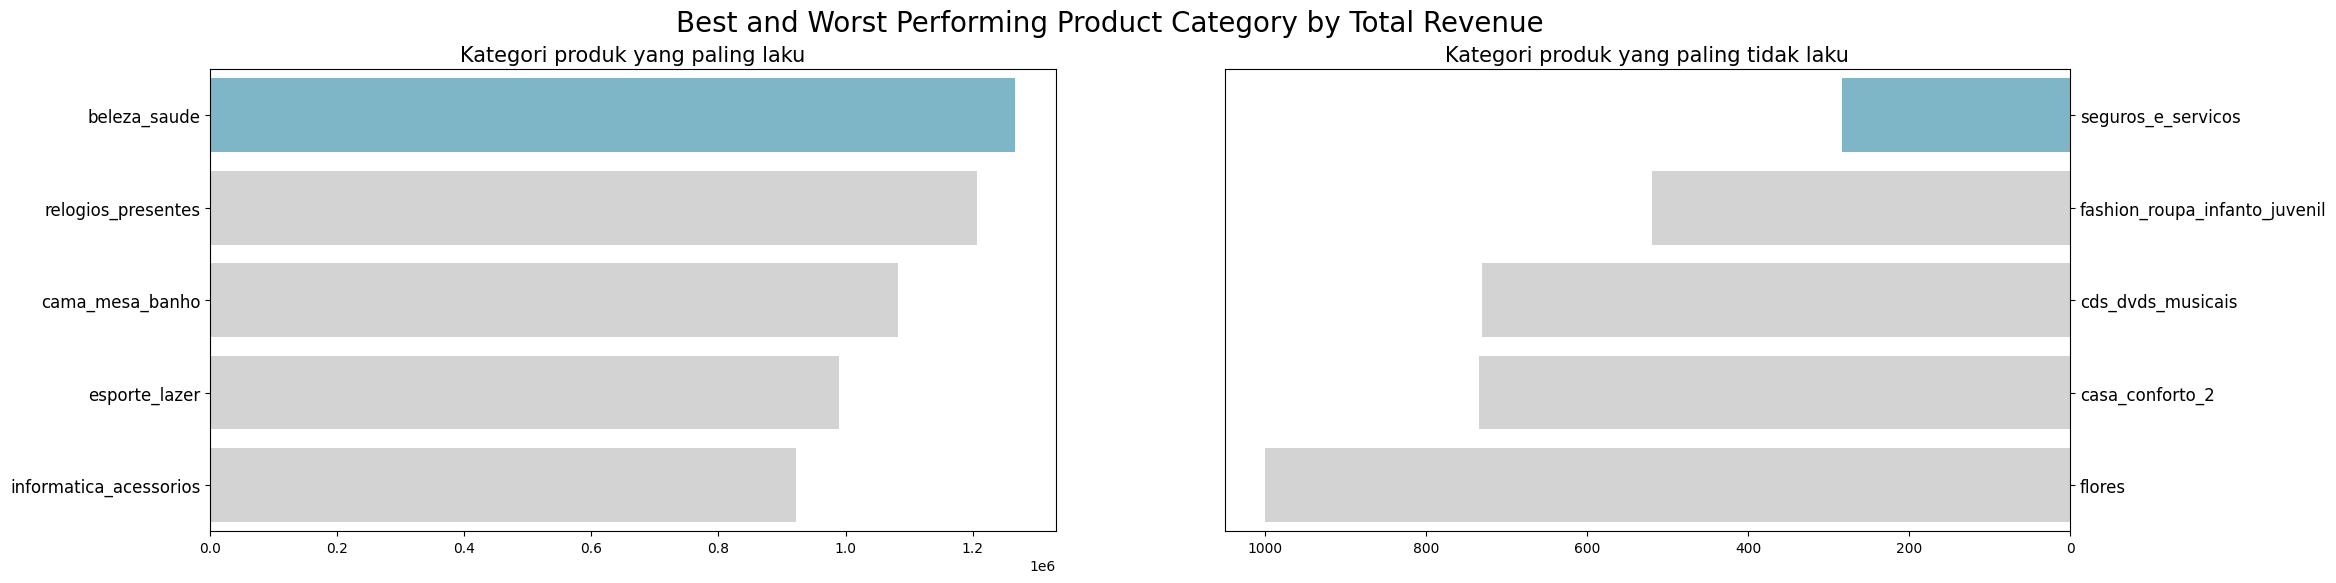

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori produk yang paling laku", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori produk yang paling tidak laku", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product Category by Total Revenue", fontsize=20)

### Pertanyaan 2: Bagaimana distribusi pesanan di berbagai negara bagian (state)?

In [84]:
bystate_df = all_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()
bystate_df

customer_state  order_id
0              SP     39724
1              RJ     12035
2              MG     11119
3              RS      5248
4              PR      4832
5              SC      3465
6              BA      3189
7              DF      2040
8              ES      1952
9              GO      1900
10             PE      1562
11             CE      1259
12             PA       916
13             MT       868
14             MA       703
15             MS       690
16             PB       504
17             RN       465
18             PI       464
19             AL       390
20             SE       332
21             TO       270
22             RO       237
23             AM       143
24             AC        78
25             AP        66
26             RR        39

In [85]:
bystate_df = all_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    "order_id" : "amount_orders"
}, inplace=True)
bystate_df

customer_state  amount_orders
0              SP          39724
1              RJ          12035
2              MG          11119
3              RS           5248
4              PR           4832
5              SC           3465
6              BA           3189
7              DF           2040
8              ES           1952
9              GO           1900
10             PE           1562
11             CE           1259
12             PA            916
13             MT            868
14             MA            703
15             MS            690
16             PB            504
17             RN            465
18             PI            464
19             AL            390
20             SE            332
21             TO            270
22             RO            237
23             AM            143
24             AC             78
25             AP             66
26             RR             39

Text(0.5, 0, 'Negara bagian (state)')

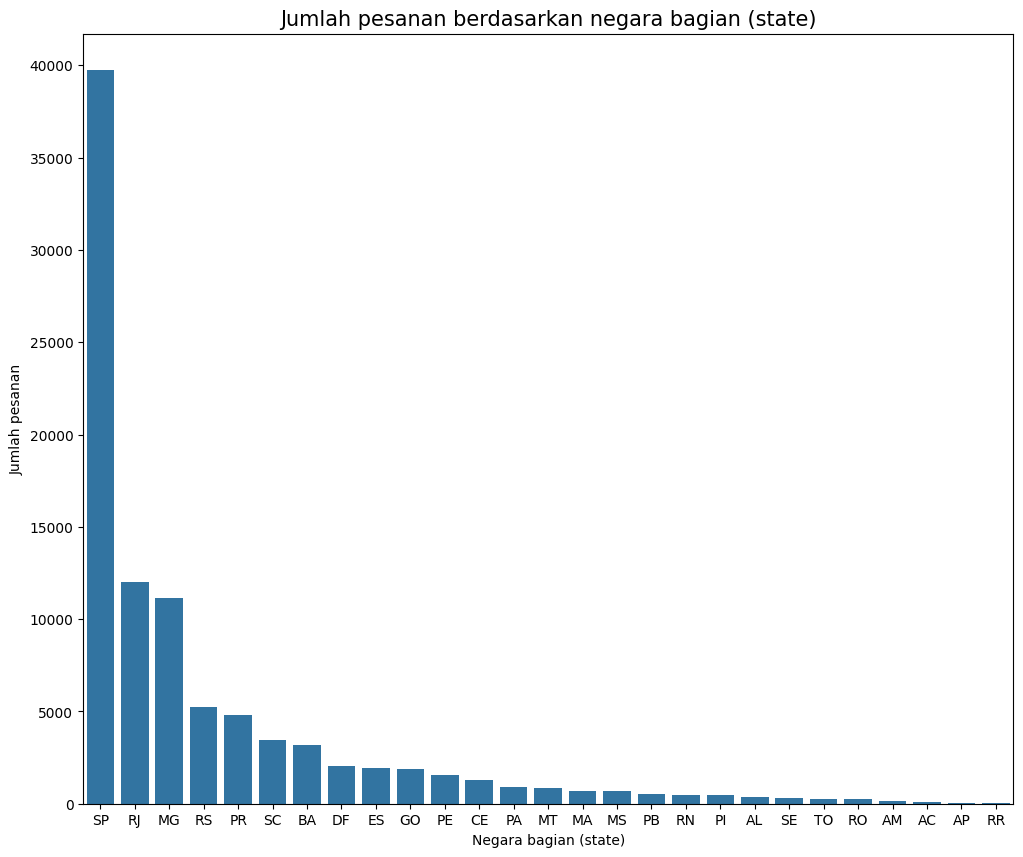

In [86]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 10))

sns.barplot(
    y="amount_orders", 
    x="customer_state",
    data=bystate_df.sort_values(by="amount_orders", ascending=False)
)

plt.title("Jumlah pesanan berdasarkan negara bagian (state)", loc="center", fontsize=15)
plt.ylabel("Jumlah pesanan")
plt.xlabel("Negara bagian (state)")

## PERTANYAAN 3 : Bagaimana pengaruh dari delivery time terhadap peringkat dari pelanggan (score_review)?

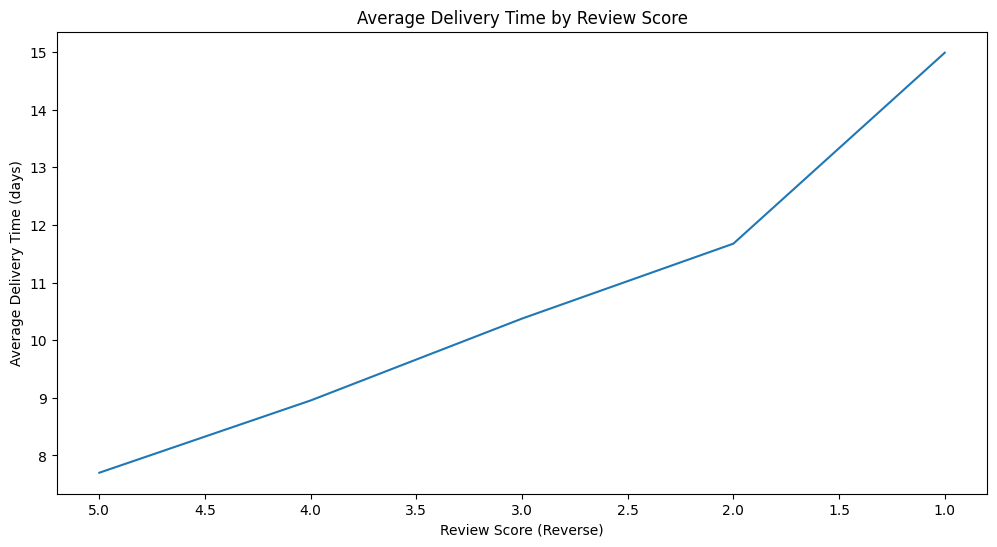

In [87]:
range_revscor_df = all_df.groupby("review_score").agg({
    "delivery_time": ["mean"]
})
fig, ax = plt.subplots(nrows=1, figsize=(12, 6))
plt.plot(range_revscor_df.index, range_revscor_df.values)
plt.gca().invert_xaxis()
plt.title("Average Delivery Time by Review Score")
plt.xlabel("Review Score (Reverse)")
plt.ylabel("Average Delivery Time (days)")

# Show the plot
plt.show()

**Visualisasi Data dan Explanatory**

- Berdasarkan dari tingkat kelarisan kategori produk. Kategori produk beleza_saude merupakan kategori produk terlaris. Sedangkan kategori produk seguros_e_servicos merupakan kategori produk yang paling tidak laris.
- Berdasarkan visualisasi data untuk tingkat pesanan tertinggi ada pada negara bagian (state) dengan kode SP, lalu disusul oleh RJ, MG dan seterusnya.
- Berdasarkan hasil visualisasi, didapatkan bahwa durasi pengiriman produk hingga ke tangan pelanggan merupakan salah satu hal yang berpengaruh terhadap tingkat peringkat (skor review) yang diberikan oleh pelanggan.

## Analisis Lanjutan
- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

### Pertanyaan 4 - 6:
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? 

In [88]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})

# menamai ulang kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date #dari datetime to date(just tanggal)
recent_date = all_df["order_purchase_timestamp"].dt.date.max() # mengambil tanggal maksimum dari all_df
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days) # max order timestamp tu terakhir masing" pelanggan melakukan transaksi, seangkan recent_date itu terakhir transaksi

# rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

customer_id max_order_timestamp  frequency  monetary  \
0  00012a2ce6f8dcda20d059ce98491703          2017-11-14          1     89.80   
1  000161a058600d5901f007fab4c27140          2017-07-16          1     54.90   
2  0001fd6190edaaf884bcaf3d49edf079          2017-02-28          1    179.99   
3  0002414f95344307404f0ace7a26f1d5          2017-08-16          1    149.90   
4  000379cdec625522490c315e70c7a9fb          2018-04-02          1     93.00   

   recency  
0      288  
1      409  
2      547  
3      378  
4      149

#### Melakukan visualisasi dari proses RFM di atas

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\701400838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(), palette=colors, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\701400838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(), palette=colors, ax=ax[1])
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\701400838.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the

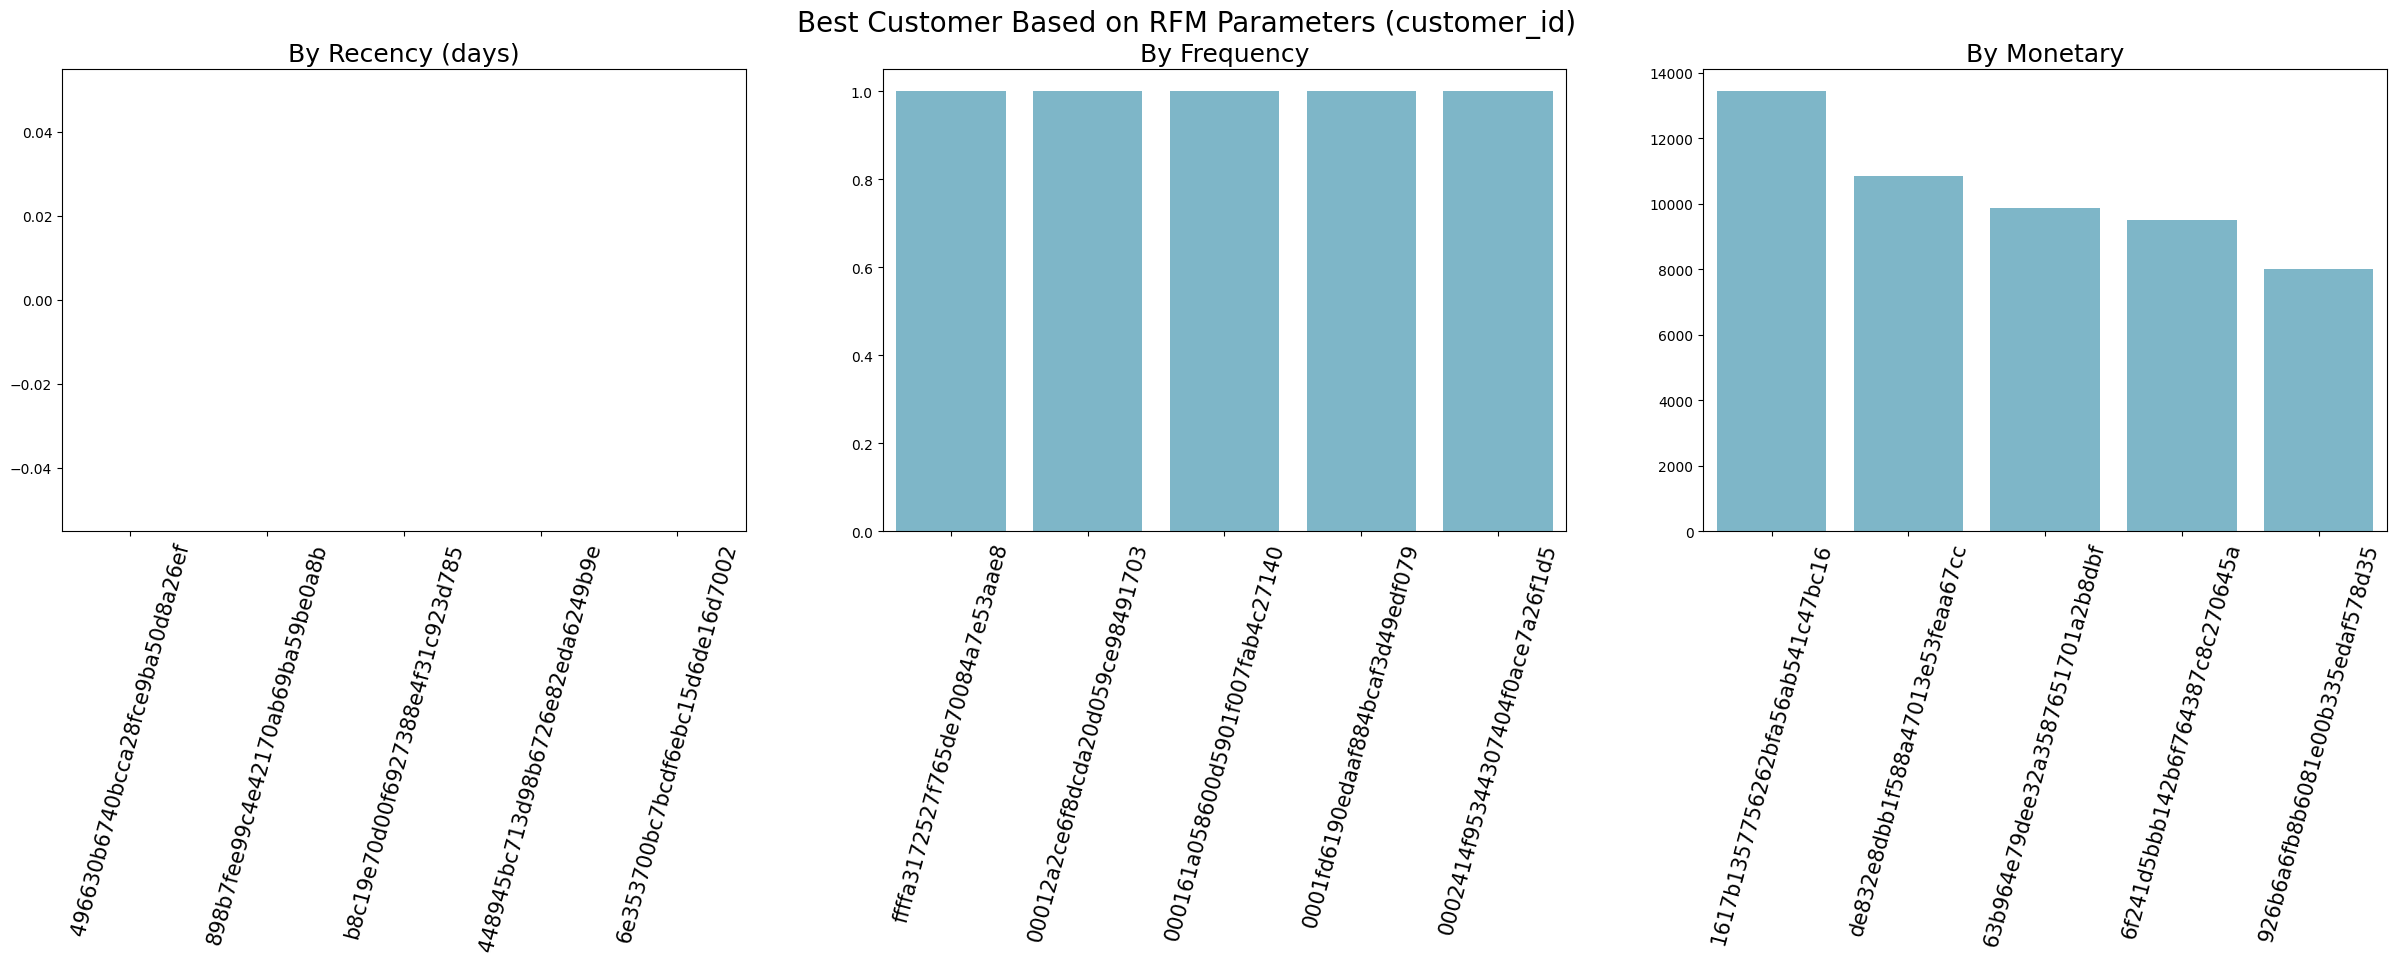

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=75)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15, rotation=75)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15, rotation=75)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Pertanyaan 7 : Bagaimana pelanggan dapat disegmentasikan berdasarkan kebiasaan pembelian mereka?

In [90]:

rfm_df["recency_score"] = pd.qcut(
    rfm_df['recency'], 
    q=5,  # This is the number of quantiles (bins)
    labels=[5, 4, 3, 2, 1],  # These are your bin labels, must match the number of bins
    duplicates='drop'  # Handle duplicate edges if necessary
)
# Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest frequency)
rfm_df["frequency_score"] = pd.qcut(rfm_df["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm_df['segment'] = rfm_df['recency_score'].astype(str) + rfm_df['frequency_score'].astype(str)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

customer_id  frequency  monetary  recency  \
0  00012a2ce6f8dcda20d059ce98491703          1     89.80      288   
1  000161a058600d5901f007fab4c27140          1     54.90      409   
2  0001fd6190edaaf884bcaf3d49edf079          1    179.99      547   
3  0002414f95344307404f0ace7a26f1d5          1    149.90      378   
4  000379cdec625522490c315e70c7a9fb          1     93.00      149   

  recency_score frequency_score segment  
0             2               1      21  
1             1               1      11  
2             1               1      11  
3             2               1      21  
4             4               1      41

In [91]:
# Mapping of segments to their corresponding customer segments

seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
}

In [92]:
# Map RFM segments to corresponding customer segments using predefined seg_map
rfm_df['segment'] = rfm_df['segment'].replace(seg_map, regex=True)

# Keep only relevant columns and return the resulting dataframe
rfm_df = rfm_df[["recency", "frequency", "monetary", "segment"]]

rfm_df.index = rfm_df.index.astype(int)  # Convert index to integer
rfm_df.head()

recency  frequency  monetary      segment
0      288          1     89.80  hibernating
1      409          1     54.90  hibernating
2      547          1    179.99  hibernating
3      378          1    149.90  hibernating
4      149          1     93.00    promising

In [93]:
# Grouping in rfm df based on the important columns
rfm_df = rfm_df[["segment", "recency", "frequency", "monetary"]]

# Grouping the mean rfm value
mean_recency = rfm_df.groupby("segment")["recency"].mean().reset_index()
mean_frequency = rfm_df.groupby("segment")["frequency"].mean().reset_index()
mean_monetary = rfm_df.groupby("segment")["monetary"].mean().reset_index()

#### Visualisasi berdasarkan perilaku/kebiasaan dari pelanggan dari masing - masing segmentasi

Text(0.5, 0.98, 'RFM ANALYSIS')

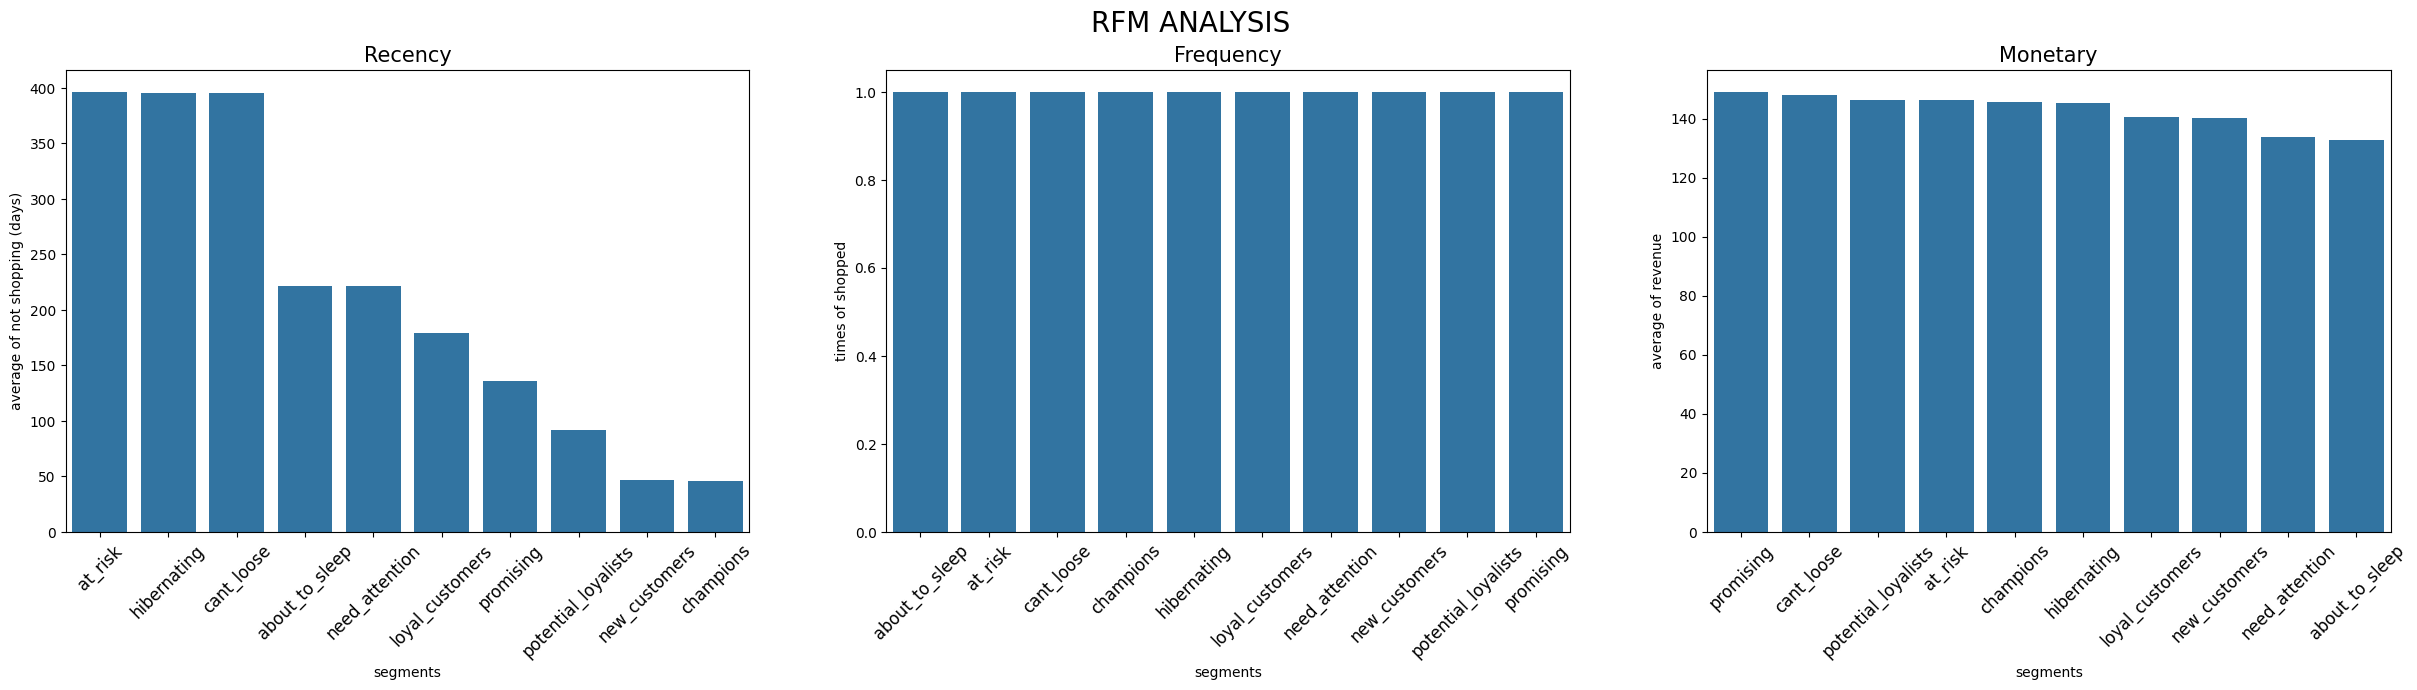

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(y="recency", x="segment", data=mean_recency.sort_values(by="recency", ascending=False), ax=ax[0])
ax[0].set_ylabel("average of not shopping (days)")
ax[0].set_xlabel("segments")
ax[0].set_title("Recency", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=12, rotation=45)
 
sns.barplot(y="frequency", x="segment", data=mean_frequency.sort_values(by="frequency", ascending=False), ax=ax[1])
ax[1].set_ylabel("times of shopped")
ax[1].set_xlabel("segments")
ax[1].set_title("Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis ='x', labelsize=12, rotation=45)

sns.barplot(y="monetary", x="segment", data=mean_monetary.sort_values(by="monetary", ascending=False), ax=ax[2])
ax[2].set_ylabel("average of revenue")
ax[2].set_xlabel("segments")
ax[2].set_title("Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis ='x', labelsize=12, rotation=45)
 
 
plt.suptitle("RFM ANALYSIS", fontsize=20)

#### Visualisasi berdasarkan jumlah pelanggan di masing-masing segmentasi

Text(0.5, 0.98, 'Final Result RFM Analysis')

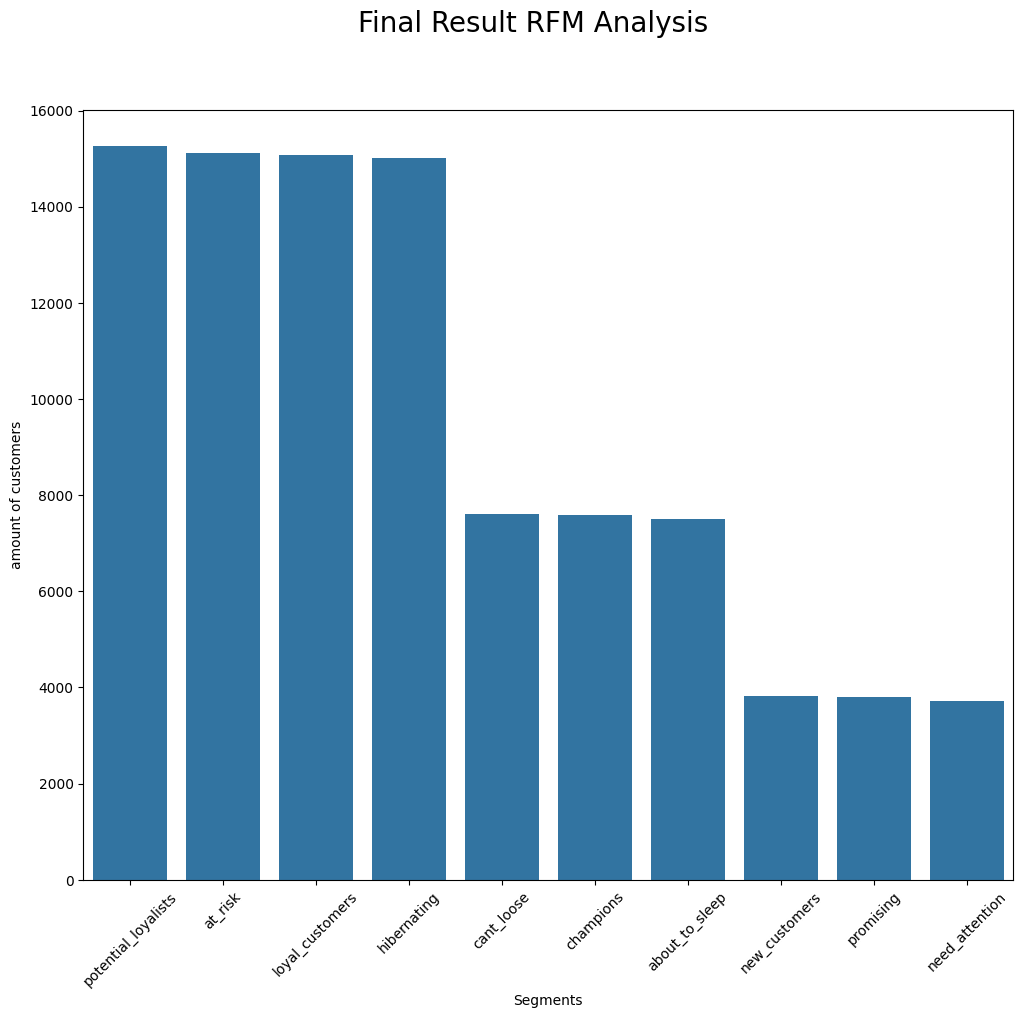

In [95]:
rfm_detail_df = rfm_df.groupby("segment").count().reset_index()
fig, ax = plt.subplots(nrows=1, figsize=(12, 10))

sns.barplot(
    y="recency", 
    x="segment",
    data=rfm_detail_df.sort_values(by="recency", ascending=False)
)
plt.ylabel("amount of customers")
plt.xlabel("Segments")
plt.xticks(rotation=45)
plt.suptitle("Final Result RFM Analysis", fontsize=20)
 

**Insight:**

- Berdasarkan visualisasi Best Customer Based on RFM Parameters (customer_id) didapatkan customer_id yang waktu pembeliannya terkini(recency), customer_id dengan jumlah pemesanan terbanyak (frequency), serta customer_id dengan jumlah pembelian tertinggi(monetary)
- Berdasarkan visualisasi RFM ANALYSIS recency didapatkan bahwa cukup banyak pelanggan yang sudah lama tidak melakukan pembelian Kembali. Selanjutnya dari segi Frequency, didapatkan bahwa keseluruhan segmentasi pelanggan rata-rata hanya melakukan pembelian sebanyak 1 kali. Terakhir untuk Monetary. Terdapat pelanggan dalam kategori at_risk yang perlu diperhatikan karena pelanggan tersebut memberikan pendapatan yang cukup tinggi kepada perusahaan.
- Berdasarkan visualisasi Final Result RFM Analysis didapatkan detail jumlah pelanggan yang berada dalam segmentasi tertentu. Didapatkan juga jumlah cukup banyak pelanggan dalam kategori at_risk dan hibernating. Sehingga perlu dilakukan langkah lebih lanjut.

## Conclusion

- Berdasarkan dari tingkat kelarisan kategori produk. Kategori produk beleza_saude merupakan kategori produk terlaris. Sedangkan kategori produk seguros_e_servicos merupakan kategori produk yang paling tidak laris.
- Berdasarkan visualisasi data untuk tingkat pesanan tertinggi ada pada negara bagian (state) dengan kode SP, lalu disusul oleh RJ, MG dan seterusnya.
- Berdasarkan hasil visualisasi, didapatkan bahwa durasi pengiriman produk hingga ke tangan pelanggan merupakan salah satu hal yang berpengaruh terhadap tingkat peringkat (skor review) yang diberikan oleh pelanggan.
- Berdasarkan visualisasi Best Customer Based on RFM Parameters (customer_id) didapatkan customer_id yang waktu pembeliannya terkini(recency), customer_id dengan jumlah pemesanan terbanyak (frequency), serta customer_id dengan jumlah pembelian tertinggi(monetary)
- Berdasarkan visualisasi RFM ANALYSIS recency didapatkan bahwa cukup banyak pelanggan yang sudah lama tidak melakukan pembelian Kembali. Selanjutnya dari segi Frequency, didapatkan bahwa keseluruhan segmentasi pelanggan rata-rata hanya melakukan pembelian sebanyak 1 kali. Terakhir untuk Monetary. Terdapat pelanggan dalam kategori at_risk yang perlu diperhatikan karena pelanggan tersebut memberikan pendapatan yang cukup tinggi kepada perusahaan.
- Berdasarkan visualisasi Final Result RFM Analysis didapatkan detail jumlah pelanggan yang berada dalam segmentasi tertentu. Didapatkan juga jumlah cukup banyak pelanggan dalam kategori at_risk dan hibernating. Sehingga perlu dilakukan langkah lebih lanjut.